## Seasonality on cattles

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as snb
import itertools
from functools import reduce
%matplotlib inline

### 1. Data Processing 

In [2]:
fc=pd.read_csv("fc.csv",sep=";",decimal=',',index_col="date")  # feeder cattle
fc.index=pd.to_datetime(fc.index)
lc=pd.read_csv("lc.csv",sep=";",decimal=',',index_col="date")  # live cattle
lc.index=pd.to_datetime(lc.index)
lh=pd.read_csv("lh.csv",sep=";",decimal=',',index_col="date")  # live hog
lh.index=pd.to_datetime(lh.index)
fc,lc,lh = fc.sort_index(), lc.sort_index(), lh.sort_index()

In [174]:
# combine in one Dataframe
def children_merge(c1,c2):
    return pd.merge(c1,c2,left_index=True, right_index=True, how='outer')

def get_child(parent, name, ignore = False):
    if ignore:
        child = parent[(parent['child_ric'].str.startswith(name))]
    else:
        child = parent[(parent['child_ric'] == name)]
    child.drop('child_ric',1,inplace=True)
    child.columns = [name]
    return child


childrenData = []
childName = []
for parent in [fc,lc,lh]:
    children = list(parent['child_ric'].unique())
    childrenData += [get_child(parent,child) for child in children]
    childName += children

allData = reduce(children_merge,childrenData)
# record tradingStatus, "True" means price data are available and we assume instruments are tradable
tradingStatus = (allData.isna() == False)
tradingStatus


#Ignore year code data
childrenDataIgnore = []
childNameIgnore = []
for parent in [fc,lc,lh]:
    children = list(parent['child_ric'].str.slice(0,3).unique())
    childrenDataIgnore += [get_child(parent,child,ignore = True) for child in children]
    childNameIgnore += children
childrenDataIgnore.pop() # somehow "LHF" is empty 
childNameIgnore.pop()  #LHF
    
allDataIgnore = reduce(children_merge,childrenDataIgnore)
tradingStatusIgnore = (allDataIgnore.isna() == False)
tradingStatusIgnore


C:\Users\kai\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,FCF,FCK,FCJ,FCH,FCQ,FCU,FCV,FCX,LCV,LCZ,...,LCH,LCF,LHM,LHG,LHJ,LHN,LHV,LHQ,LHZ,LHK
date,,,,,,,,,,,,,,,,,,,,,
1995-12-01,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1995-12-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1995-12-03,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1995-12-04,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1995-12-05,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1995-12-06,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1995-12-07,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1995-12-08,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1995-12-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [187]:
children_merge(childrenDataIgnore[1],childrenDataIgnore[2])

,FCK,FCJ
date,,
1996-01-01,NaN,NaN
1996-01-02,58.325,58.125
1996-01-03,58.550,58.350
1996-01-04,58.250,58.050
1996-01-05,58.675,58.500
1996-01-06,NaN,NaN
1996-01-07,NaN,NaN
1996-01-08,59.375,59.200
1996-01-09,58.775,58.525


,FCK,FCJ,FCH,FCQ,FCU,FCV,FCX,LCV,LCZ,LCM,...,LCJ,LCQ,LCK,LCN,LCU,LCX,LCH,LCF,LHM,LHG
date,,,,,,,,,,,,,,,,,,,,,
1995-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.825,NaN
1995-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.550,NaN
1995-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.250,NaN
1995-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.675,NaN
1995-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.125,NaN
1995-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.175,NaN
1995-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
childrenDataIgnore[8]

,LCV
date,
1996-01-01,NaN
1996-01-02,62.650
1996-01-03,62.825
1996-01-04,62.800
1996-01-05,62.750
1996-01-06,NaN
1996-01-07,NaN
1996-01-08,62.900
1996-01-09,62.850


#### quick look at spread between **FCF** and others 

In [205]:
mapdict = {"FC":0,"LC":1,"LH":2}
def plot_spread_of(target, month = "whatever"):
    namelist = childNameIgnore.copy()
    namelist.remove(target)
    fig,ax = plt.subplots(3,1,figsize=(25,25))
    for inst in namelist:  
        token = mapdict[inst[:2]] 
        
        #ax = fig.add_subplot(10, 3, num, frameon=False)
        if (allDataIgnore[target]-allDataIgnore[inst]).any() and (month in (inst[2], "whatever")):
            ax[token].plot((allDataIgnore[target]-allDataIgnore[inst]),linewidth=0.5)
            print("%s vs %s" % (target,inst))

In [145]:
sample = (allDataIgnore["FCF"]-allDataIgnore["LHK"])

In [209]:
allData.shape

(8199, 246)

FCF vs FCK
FCF vs FCJ
FCF vs FCH
FCF vs FCQ
FCF vs FCU
FCF vs FCV
FCF vs FCX
FCF vs LCV
FCF vs LCZ
FCF vs LCM
FCF vs LCG
FCF vs LCJ
FCF vs LCQ
FCF vs LCK
FCF vs LCN
FCF vs LCU
FCF vs LCX
FCF vs LCH
FCF vs LCF
FCF vs LHM
FCF vs LHG
FCF vs LHJ
FCF vs LHN
FCF vs LHV
FCF vs LHQ
FCF vs LHZ
FCF vs LHK


KeyError: 'LHF'

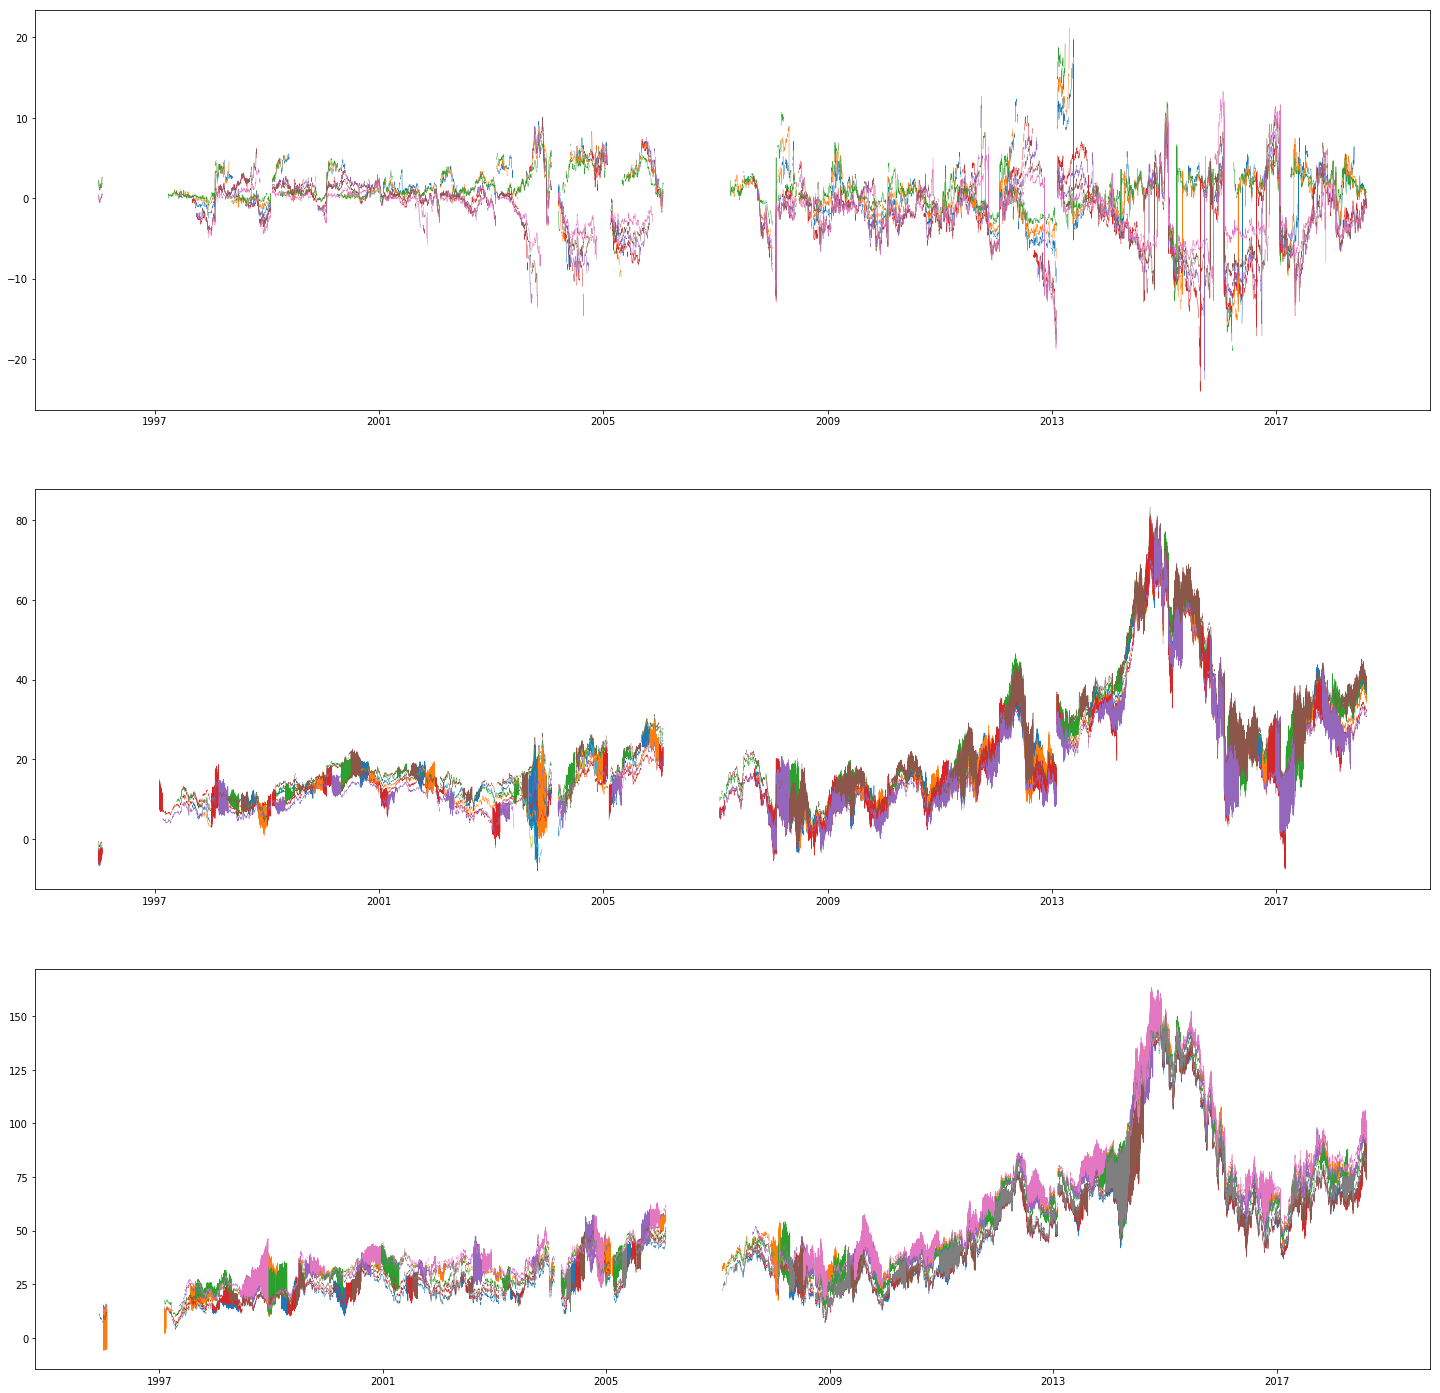

In [206]:
plot_spread_of("FCF")

In [77]:
ax[bar[token]][token].plot(allData_ig[childName_ig[0]]-allData_ig[inst],linewidth=1)

In [78]:
fig = plt.figure(figsize=(18, 35))
ax[bar[token]][token].plot(allData_ig[childName_ig[0]]-allData_ig[inst],linewidth=1)
plt.show()

<Figure size 1296x2520 with 0 Axes>

In [86]:
allData_ig.fillna(0)

,FCF,FCK,FCJ,FCH,FCQ,FCU,FCV,FCX,LCV,LCZ,...,LCF,LHM,LHG,LHJ,LHN,LHV,LHQ,LHZ,LHK,LHF
date,,,,,,,,,,,,,,,,,,,,,
1995-12-01,65.150,0.0,0.00,0.000,0.000,0.000,0.0,0.00,0.00,0.000,...,0.0,53.825,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.0
1995-12-02,0.000,0.0,0.00,0.000,0.000,0.000,0.0,0.00,0.00,0.000,...,0.0,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.0
1995-12-03,0.000,0.0,0.00,0.000,0.000,0.000,0.0,0.00,0.00,0.000,...,0.0,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.0
1995-12-04,65.425,0.0,0.00,0.000,0.000,0.000,0.0,0.00,0.00,0.000,...,0.0,54.550,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.0
1995-12-05,65.425,0.0,0.00,0.000,0.000,0.000,0.0,0.00,0.00,0.000,...,0.0,54.250,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.0
1995-12-06,65.425,0.0,0.00,0.000,0.000,0.000,0.0,0.00,0.00,0.000,...,0.0,54.675,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.0
1995-12-07,65.375,0.0,0.00,0.000,0.000,0.000,0.0,0.00,0.00,0.000,...,0.0,55.125,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.0
1995-12-08,65.125,0.0,0.00,0.000,0.000,0.000,0.0,0.00,0.00,0.000,...,0.0,55.175,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.0
1995-12-09,0.000,0.0,0.00,0.000,0.000,0.000,0.0,0.00,0.00,0.000,...,0.0,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.0


In [345]:
a.str.slice(0,3).unique()

array(['FCF', 'FCK', 'FCJ', 'FCH', 'FCQ', 'FCU', 'FCV', 'FCX'],
      dtype=object)

In [97]:
def children_merge(c1,c2):
    return pd.merge(c1,c2,left_index=True, right_index=True, how='outer')

In [212]:
def get_child(parent, name):
    child = parent[(parent['child_ric'] == name)]
    child.drop('child_ric',1,inplace=True)
    child.columns = [name]
    return child

In [217]:
parent = lh
child = parent[(parent['child_ric'] == 'LHN2')]
lh.loc['2011-08-13']

,child_ric,settlement
date,,
2011-08-13,LHN2,NaN
2011-08-13,LHZ2,NaN
2011-08-13,LHG2,NaN
2011-08-13,LHQ1,NaN
2011-08-13,LHV2,NaN
2011-08-13,LHK2,NaN
2011-08-13,LHZ1,NaN
2011-08-13,LHG3,NaN
2011-08-13,LHM2,NaN


In [240]:
date = '1999-01-07'
all_data.loc[date][all_data.loc[date].isna() == False]

LHG9    36.725
LHJ9    41.050
LHM9    51.250
LHN9    52.900
LHQ9    54.875
LHV9    55.450
LHZ9    56.300
LHG0    57.500
LHJ0    57.700
Name: 1999-01-07 00:00:00, dtype: float64

child_ric     79910
settlement    54718
dtype: int64

In [224]:
.loc['2011-08-11']

C:\Users\kai\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


LHN2    94.7
Name: 2011-08-11 00:00:00, dtype: float64

In [254]:
1-1/12

0.9166666666666666